# Sankey diagram development

In [103]:
import plotly.graph_objects as go
import btrack
import numpy as np
import json
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Define the source nodes.
# establishing source identities
source_IDs = [0, # infected macrophage 
              1, # uninfected macrophage
             ]
# Define the target nodes.
#establishing target identities
target_IDs = [2, # uninfected macrophage 
              3, # infected macrophage
              4, # dead macrophage
             ]
# what about efferocytosis? 

# Each element in the list represents the starting identity of a single class of cell
source = [0, 0, 1, 1, 0]
# Each element in the list represents the endpoint of a flow from the corresponding source.
target = [2, 3, 4, 5, 4]

# Define the value of each flow.
# The value represents the magnitude or the amount of flow from the source to the target.
value = [8, 2, 2, 8, 4]

# Create a dictionary to define the links between the source and target nodes.
# This dictionary includes the sources, targets, and their corresponding values.
link = dict(source=source, target=target, value=value)

# Create a Sankey diagram data object using Plotly's graph object library.
# The Sankey method takes the link dictionary as a parameter to define the flows in the diagram.
data = go.Sankey(link=link)

# Create a figure object and add the Sankey diagram data to it.
# The figure object serves as a container for the plot.
fig = go.Figure(data)

# Write the figure to an HTML file for easy sharing and display.
# This saves the visualization as an interactive HTML file named 'sankey-diagram-plotly1.html'.
fig.write_html("sankey-diagram-plotly1.html")

In [18]:
%%html
<iframe src="sankey-diagram-plotly1.html" width="800" height="600" title="ridgeline chart with plotly" style="border:none"></iframe>


# Extracting some preliminary data

In [86]:
expt_ID = 'PS0000'
acq_ID = row, column = (3, 5)

In [72]:
tracks_fn = f'/mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/{acq_ID}.h5'
dict_fn = f'/mnt/DATA/macrohet/{expt_ID}/upstream_development/tracking/tracking_performance/v1>70/{row},{column}/{acq_ID}_track_assessment.json'

In [67]:
with btrack.io.HDF5FileHandler(tracks_fn, 'r', obj_type='obj_type_1') as reader:
    tracks = reader.tracks

[INFO][2023/12/19 01:41:32 PM] Opening HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5...
[INFO][2023/12/19 01:41:32 PM] Loading tracks/obj_type_1
[INFO][2023/12/19 01:41:32 PM] Loading LBEP/obj_type_1
[INFO][2023/12/19 01:41:32 PM] Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
[INFO][2023/12/19 01:41:32 PM] Closing HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5


In [73]:
with open(dict_fn) as json_data:
    track_dict = json.load(json_data)

In [44]:
track_dict

{'425': True,
 '694': True,
 '403': False,
 '427': True,
 '453': False,
 '217': True,
 '1002': False,
 '1893': False,
 '1986': False,
 '2192': False,
 '401': True,
 '412': False,
 '2499': False,
 '1446': False,
 '1003': True,
 '790': False,
 '1552': False,
 '2862': False,
 '432': True,
 '456': True,
 '461': True,
 '416': True,
 '1892': False,
 '430': True,
 '1226': True,
 '1783': True,
 '429,2818': 'Link',
 '431': True,
 '407': True,
 '2675,404': 'Link',
 '398': True,
 '423': True,
 '424': True,
 '428': False,
 '418': False,
 '411': False,
 '411,1683': 'Link',
 '1058': False,
 '466': True,
 '465': True,
 '397': True,
 '426': True,
 '419': True,
 '1735': True,
 '420': True,
 '421': True,
 '802': True,
 '455': False,
 '406': False,
 '410': True,
 '411,1118': 'Link',
 '1118': True,
 '1114,2130': 'Link',
 '414': True,
 '459': True,
 '2234': True,
 '470': True,
 '437': True,
 '1649,2453': 'Link',
 '2453,3126': 'Link',
 '444': True,
 '865': False,
 '441': True,
 '318': False,
 '2952': False,

In [49]:
true_IDs = [int(ID) for ID in track_dict.keys() if track_dict[ID] == True]

In [52]:
true_tracks = [t for t in tracks if t.ID in true_IDs]

In [56]:
len(true_tracks)

384

In [55]:
true_tracks[0]

,ID,t,x,y,z,parent,root,state,generation,dummy,area,Infected,major_axis_length,mean_intensity,minor_axis_length,orientation
0,423,0,723.909912,33.010132,0.000000,423,423,5,0,False,23203.0,1.0,344.046997,"(3,) array",87.624420,-0.105442
1,423,1,727.771362,38.211437,0.000000,423,423,5,0,False,25659.0,1.0,410.356964,"(3,) array",95.545296,-0.105384
2,423,2,730.887634,26.283424,0.000000,423,423,5,0,False,19483.0,1.0,281.636444,"(3,) array",89.392372,-0.172310
3,423,3,732.147583,27.895367,0.000000,423,423,5,0,False,22840.0,1.0,325.991333,"(3,) array",92.556488,-0.172292
4,423,4,730.891357,33.019173,0.000000,423,423,5,0,False,23224.0,1.0,373.707001,"(3,) array",80.582886,-0.152742
5,423,5,731.606384,30.630995,0.000000,423,423,5,0,False,21159.0,1.0,351.986481,"(3,) array",78.869858,-0.151112
6,423,6,732.788086,30.744682,0.000000,423,423,5,0,False,21750.0,1.0,358.099487,"(3,) array",79.728958,-0.169930
7,423,7,733.528625,27.149408,0.000000,423,423,5,0,False,15457.0,0.0,294.958893,"(3,) array",67.987579,-0.195798
8,423,8,733.524414,32.480957,0.000000,423,423,5,0,False,21431.0,1.0,385.717529,"(3,) array",73.575928,-0.201907
9,423,9,735.238953,29.900726,0.000000,423,423,5,0,False,22385.0,1.0,409.529633,"(3,) array",79.070381,-0.251289


In [89]:
# load sc_df 
df = pd.read_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area_false_outliers_removed.pkl')

In [93]:
len(df[df['Acquisition ID'] == acq_ID]['Unique ID'].unique())

170

### There is a discrepancy of 200 approx tracks that are less than 70 frames missing from the df with the Mtb area measurements in

This is because there are GT tracks in this (3,5) dataset that I never retroactively pulled area measurements for... shall I add now? 

In [95]:
# updated df to include all shorter tracks with mtb area measurements
df = pd.read_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/{acq_ID}_<70_sc_df_GT_dev.pkl')
df

,Time (hours),Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,Mphi GFP,x,y,Eccentricity,MSD,Technical Replicate,Strain/Compound,Mtb Area µm2,Mtb RFP,Mtb RFP thresholded
0,0,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,2220.025391,519.922607,876.779602,0.859159,0.000000,1,CTRL,46.797680,473.168976,167.325424
1,1,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,2549.692383,522.290833,876.766357,0.847926,2.368262,1,CTRL,48.719647,498.701813,202.661972
2,2,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,2653.458740,524.336243,874.563110,0.860501,3.006327,1,CTRL,52.206007,502.468353,210.382874
3,3,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,2736.911621,516.952454,876.656799,0.728416,7.674886,1,CTRL,50.552221,501.905182,212.070969
4,4,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,2490.947266,521.947449,880.909363,0.530618,6.560051,1,CTRL,54.463202,502.564423,204.565842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22813,70,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39979.0,2201.615723,579.509094,651.614807,0.970827,2.473534,1,CTRL,0.000000,378.059143,0.000000
22814,71,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,38456.0,2243.430664,579.219421,651.633118,0.972632,0.290251,1,CTRL,0.000000,377.311035,0.000000
22815,72,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39006.0,2209.442627,578.878113,652.432434,0.968598,0.869137,1,CTRL,0.000000,378.968353,0.000000
22816,73,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,35816.0,2537.284668,579.752319,652.408752,0.969917,0.874527,1,CTRL,0.000000,379.737701,0.000000


In [97]:
len(df['Unique ID'].unique())

384

### Start by classifying N_infected vs N_uninf

What classifies as infected versus uninfected? A single frame at t=0 is not enough to say the cell is infected... 

### Start by having a variable that we can vary

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



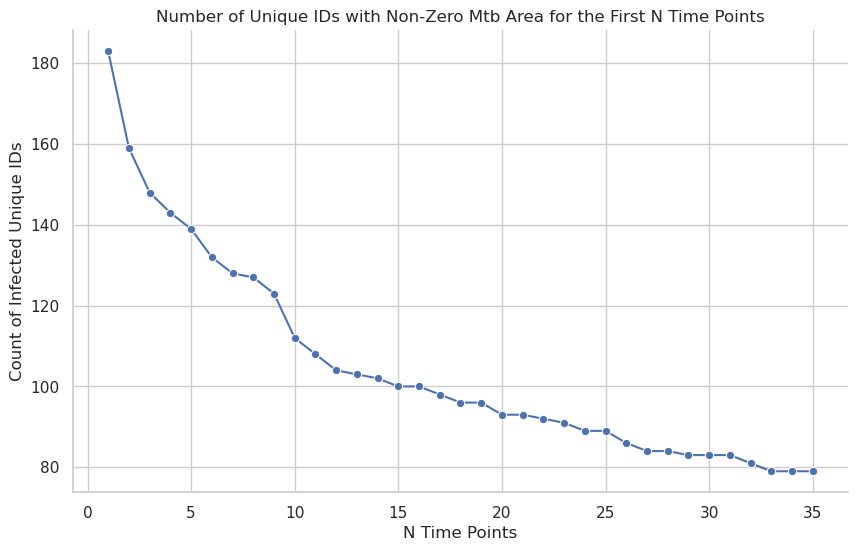

In [104]:
results = []  # To store results for each N

# Iterate over a range of N values
for N in range(1, 36):  # Iterate from 1 to 35

    # Define the function within the loop to capture the current value of N
    def check_non_zero_mtb(group):
        group = group.reset_index(drop=True)
        return (group.head(N)['Mtb Area µm2'] > 0).all()

    # Group by Unique ID and sort within groups by Time (hours)
    grouped = df.sort_values('Time (hours)').groupby('Unique ID')

    # Apply the function to each group and count the True values
    count_infected = grouped.apply(check_non_zero_mtb).sum()

    # Append the result to the results list
    results.append({'N': N, 'Count_Infected': count_infected})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create the line plot
sns.lineplot(x='N', y='Count_Infected', data=results_df, marker='o')

# Despine the plot
sns.despine()

# Adding title and labels
plt.title('Number of Unique IDs with Non-Zero Mtb Area for the First N Time Points')
plt.xlabel('N Time Points')
plt.ylabel('Count of Infected Unique IDs')

# Show the plot
plt.show()